# Projet IA HumanForYou


##  1. Préparation des données

### A. Initialisation du projet

In [83]:
# imports
import numpy as np
import seaborn as sns
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(420) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "projet"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img") # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=500):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### B. Importation

In [84]:
import os
import pandas as pd

dataSets_Path = os.path.join(".\datasets")

generalData = pd.read_csv(os.path.join(dataSets_Path, "general_data.csv"))
employeeData = pd.read_csv(os.path.join(dataSets_Path, "employee_survey_data.csv"))
managerData = pd.read_csv(os.path.join(dataSets_Path, "manager_survey_data.csv"))
csvInTimeData = pd.read_csv(os.path.join(dataSets_Path, "in_time.csv"))
csvOutTimeData = pd.read_csv(os.path.join(dataSets_Path, "out_time.csv"))

intTimeData = csvInTimeData.rename(columns={'Unnamed: 0': 'EmployeeID'})
outTimeData = csvOutTimeData.rename(columns={'Unnamed: 0': 'EmployeeID'})

In [85]:
allData = pd.merge(employeeData, generalData, how='inner', on=['EmployeeID'])
allData = allData.merge(managerData, how='inner', on=['EmployeeID'])

""" allData = allData.merge(intTimeData, how='inner', on=['EmployeeID'])
allData = allData.merge(outTimeData, how='inner', on=['EmployeeID']) """

allData.drop("EmployeeID", axis=1, inplace=True)
allData.drop("Over18", axis=1, inplace=True) 
allData.drop("EmployeeCount", axis=1, inplace=True) 
allData.drop("StandardHours", axis=1, inplace=True) 

Test = allData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4385 non-null   float64
 1   JobSatisfaction          4390 non-null   float64
 2   WorkLifeBalance          4372 non-null   float64
 3   Age                      4410 non-null   int64  
 4   Attrition                4410 non-null   object 
 5   BusinessTravel           4410 non-null   object 
 6   Department               4410 non-null   object 
 7   DistanceFromHome         4410 non-null   int64  
 8   Education                4410 non-null   int64  
 9   EducationField           4410 non-null   object 
 10  Gender                   4410 non-null   object 
 11  JobLevel                 4410 non-null   int64  
 12  JobRole                  4410 non-null   object 
 13  MaritalStatus            4410 non-null   object 
 14  MonthlyIncome           

### C. Decode valeur

In [86]:
allData['PerformanceRating'] = allData['PerformanceRating'].replace({ 1 : 'Low', 2: 'Good',3: 'Excellent',4: 'Outstanding'})
allData['EnvironmentSatisfaction'] = allData['EnvironmentSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
allData['JobSatisfaction'] = allData['JobSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
allData['JobInvolvement'] = allData['JobInvolvement'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
allData['WorkLifeBalance'] = allData['WorkLifeBalance'].replace({ 1 : 'Bad', 2: 'Good',3: 'Better',4: 'Best'})
allData['Education'] = allData['Education'].replace({ 1 : 'Below College', 2: 'College',3: 'Bachelor',4: 'Master',5 : 'Doctor'})
allData['JobLevel'] = allData["JobLevel"].replace({ 1 : 'Apprentice', 2: 'Junior Employee',3: 'Employee',4: 'Manager',5 : 'Director'})
allData['StockOptionLevel'] = allData['StockOptionLevel'].replace({ 0 : 'Low', 1: 'Medium', 2: 'High', 3: 'Very Hight'})

In [87]:
allData.describe(include="all")

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
count,4385,4390,4372,4410.000000,4410,4410,4410,4410.000000,4410,4410,...,4391.000000,4410.000000,4410,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410,4410
unique,4,4,4,NaN,2,3,3,NaN,5,6,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,4,2
top,High,Very High,Better,NaN,No,Travel_Rarely,Research & Development,NaN,Bachelor,Life Sciences,...,NaN,NaN,Low,NaN,NaN,NaN,NaN,NaN,High,Excellent
freq,1350,1367,2660,NaN,3699,3129,2883,NaN,1716,1818,...,NaN,NaN,1893,NaN,NaN,NaN,NaN,NaN,2604,3732
mean,NaN,NaN,NaN,36.923810,NaN,NaN,NaN,9.192517,NaN,NaN,...,2.694830,15.209524,NaN,11.279936,2.799320,7.008163,2.187755,4.123129,NaN,NaN
std,NaN,NaN,NaN,9.133301,NaN,NaN,NaN,8.105026,NaN,NaN,...,2.498887,3.659108,NaN,7.782222,1.288978,6.125135,3.221699,3.567327,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,1.000000,NaN,NaN,...,0.000000,11.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,2.000000,NaN,NaN,...,1.000000,12.000000,NaN,6.000000,2.000000,3.000000,0.000000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,7.000000,NaN,NaN,...,2.000000,14.000000,NaN,10.000000,3.000000,5.000000,1.000000,3.000000,NaN,NaN
75%,NaN,NaN,NaN,43.000000,NaN,NaN,NaN,14.000000,NaN,NaN,...,4.000000,18.000000,NaN,15.000000,3.000000,9.000000,3.000000,7.000000,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A791ACEF88>,
      dtype=object)

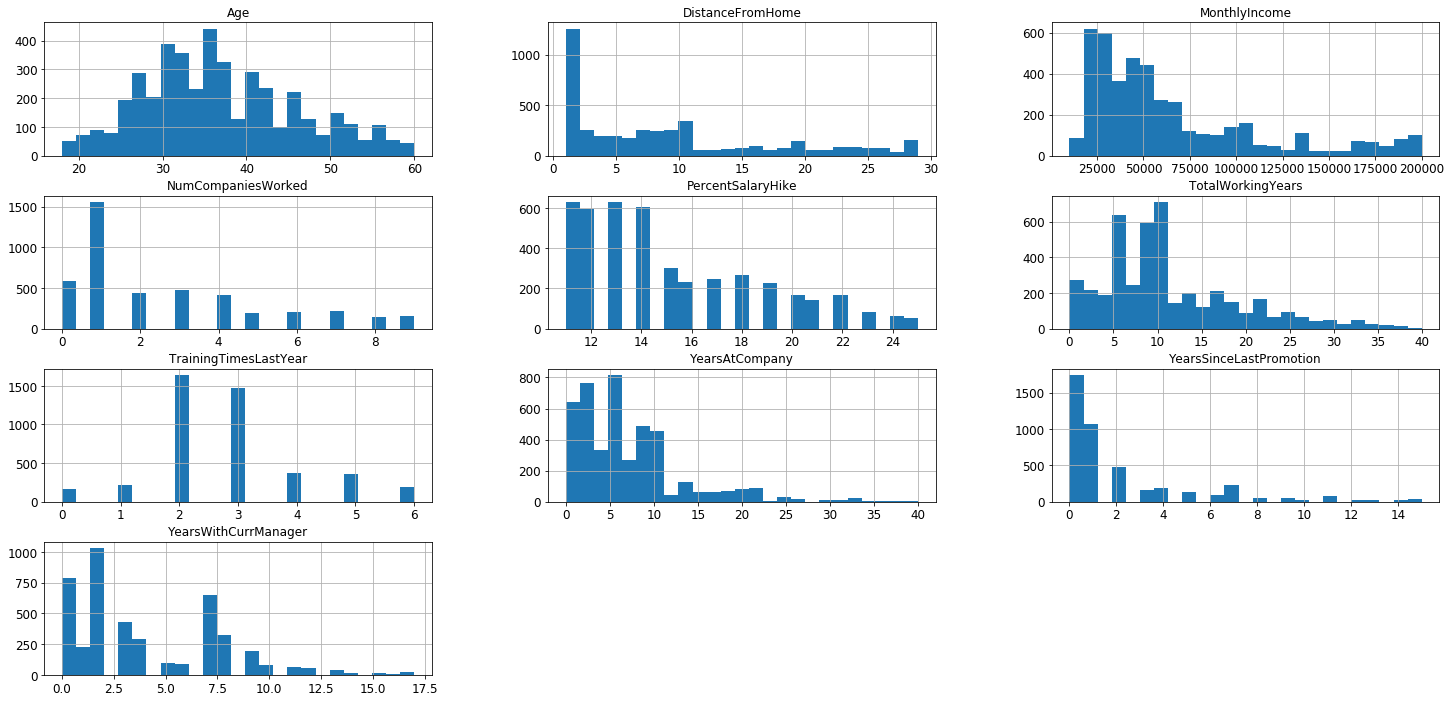

In [88]:
allData.hist(figsize=(25,12), bins=25,column=list(allData.columns))

##  2. Pré-traitement des données


### A. Analyse des variables



#### Analyse de toutes les variables qualitatives

Vous trouverez en dessous tous les graphes avec les variables de type `object` du jeu de données.

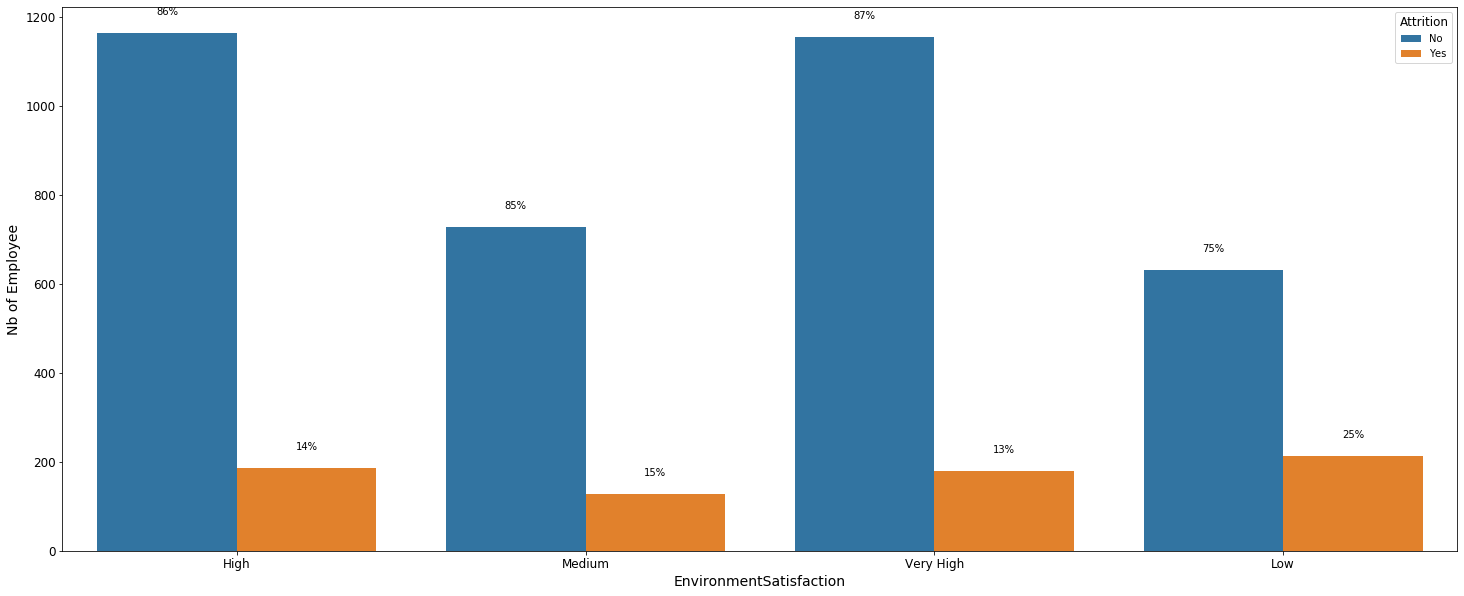

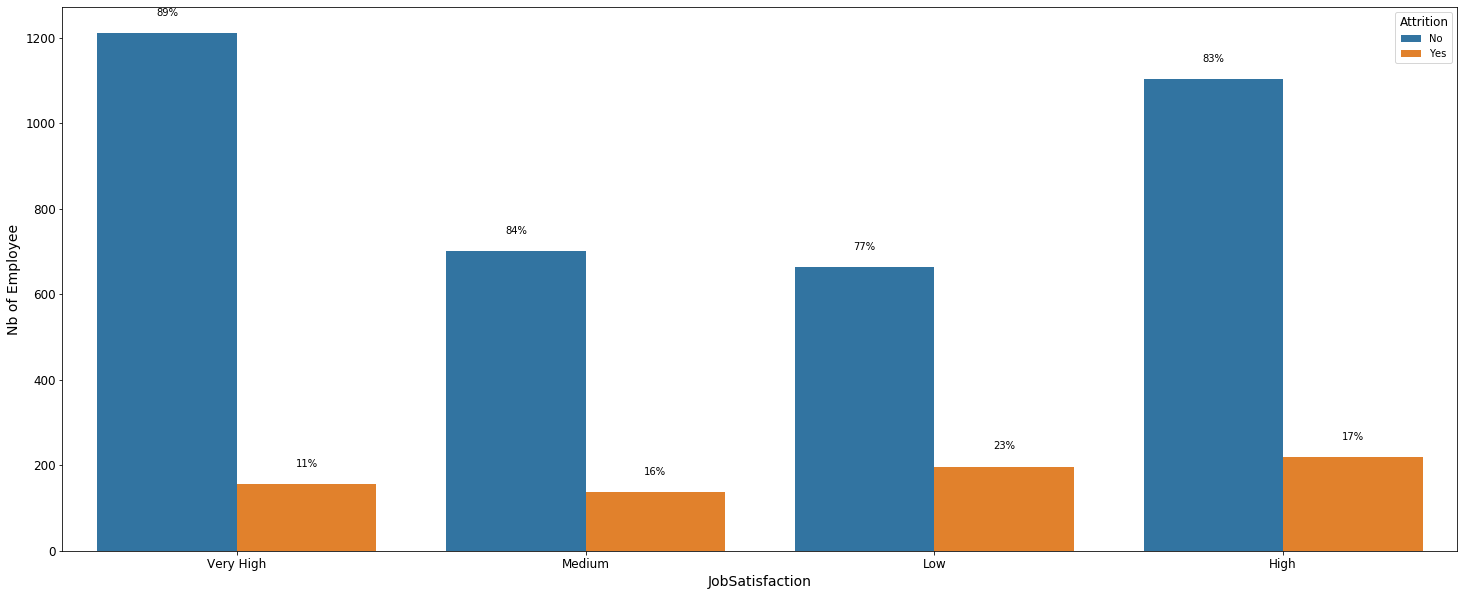

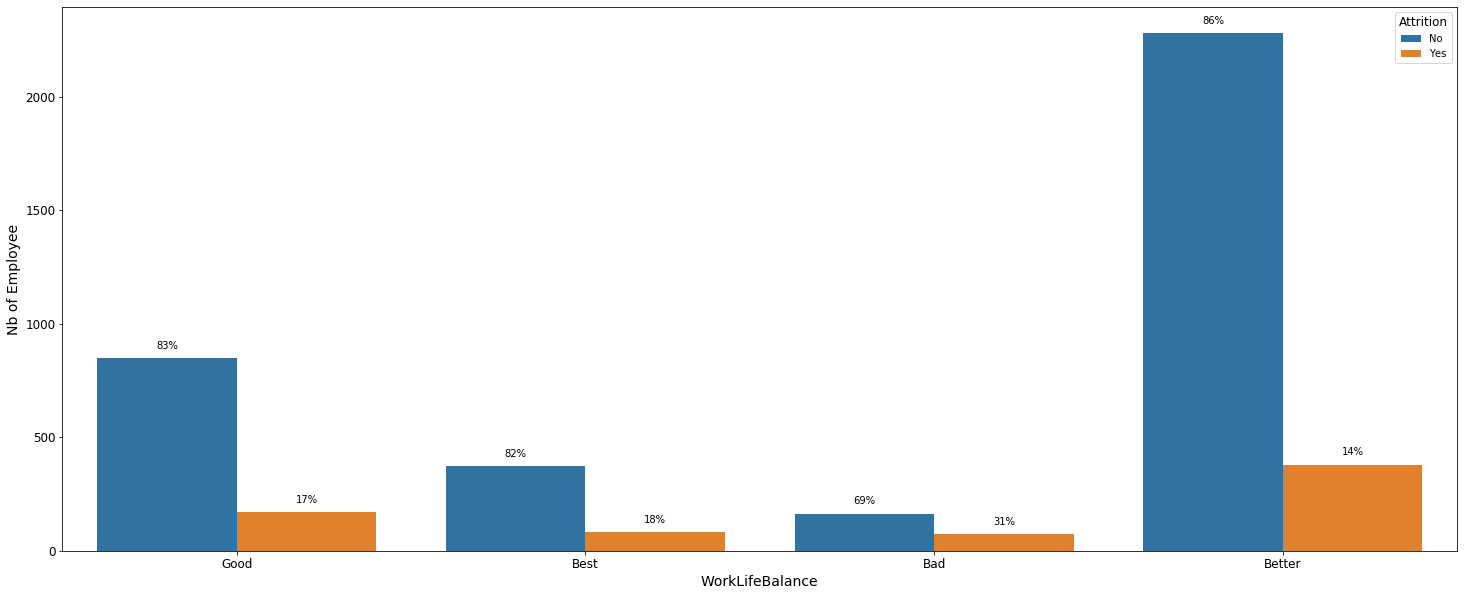

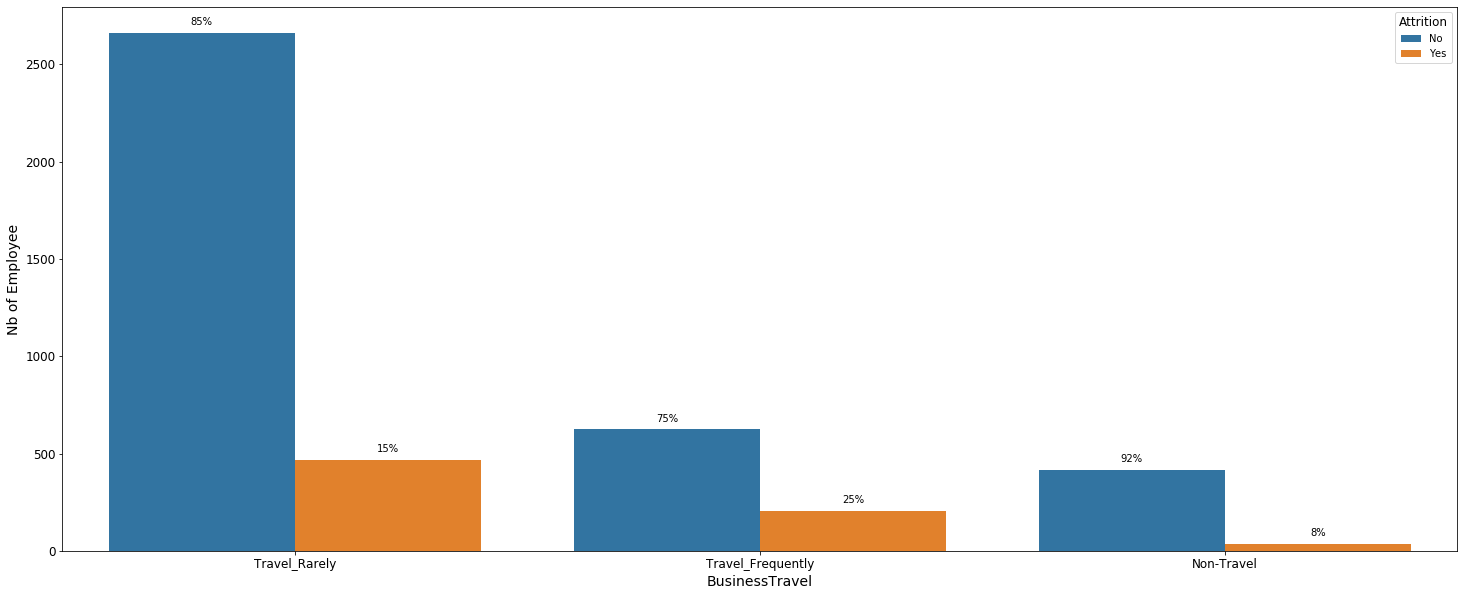

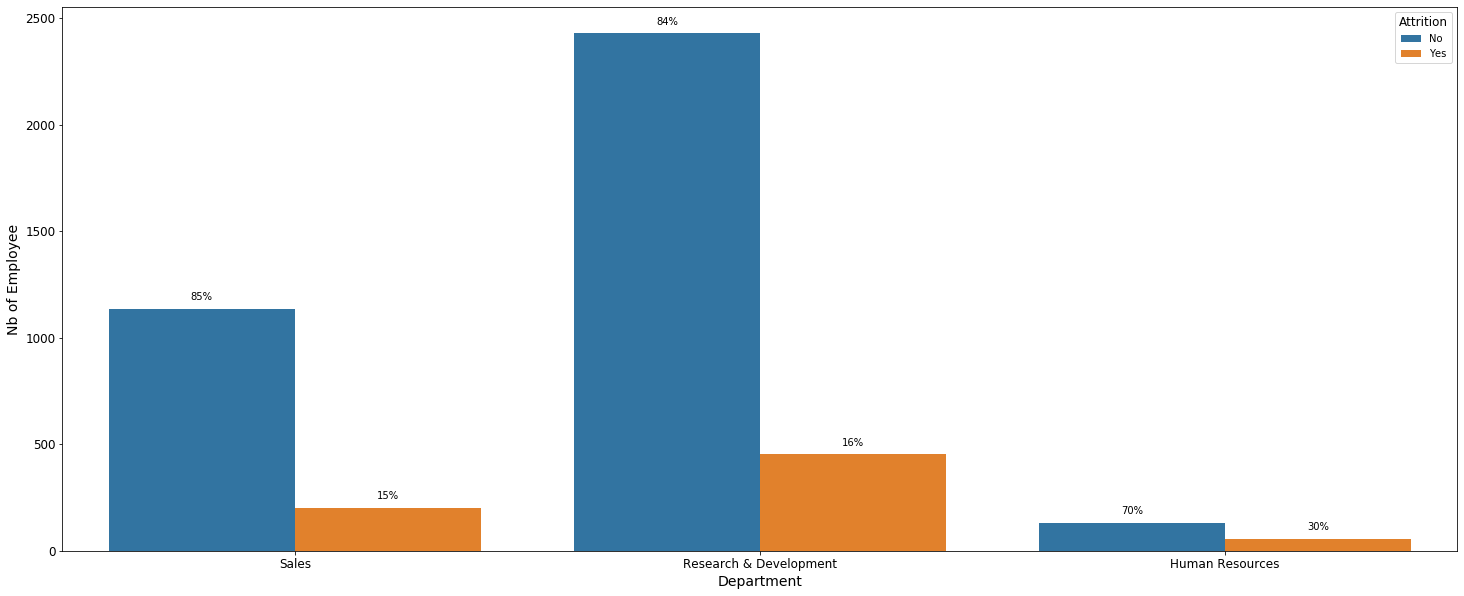

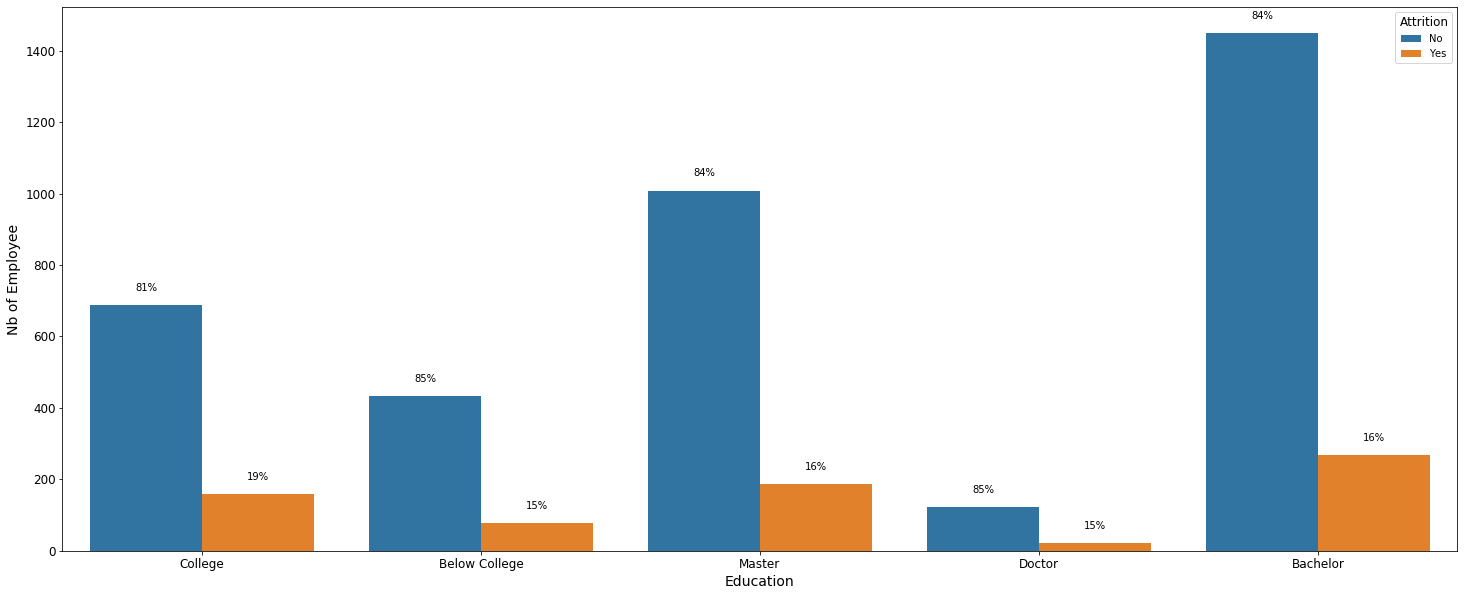

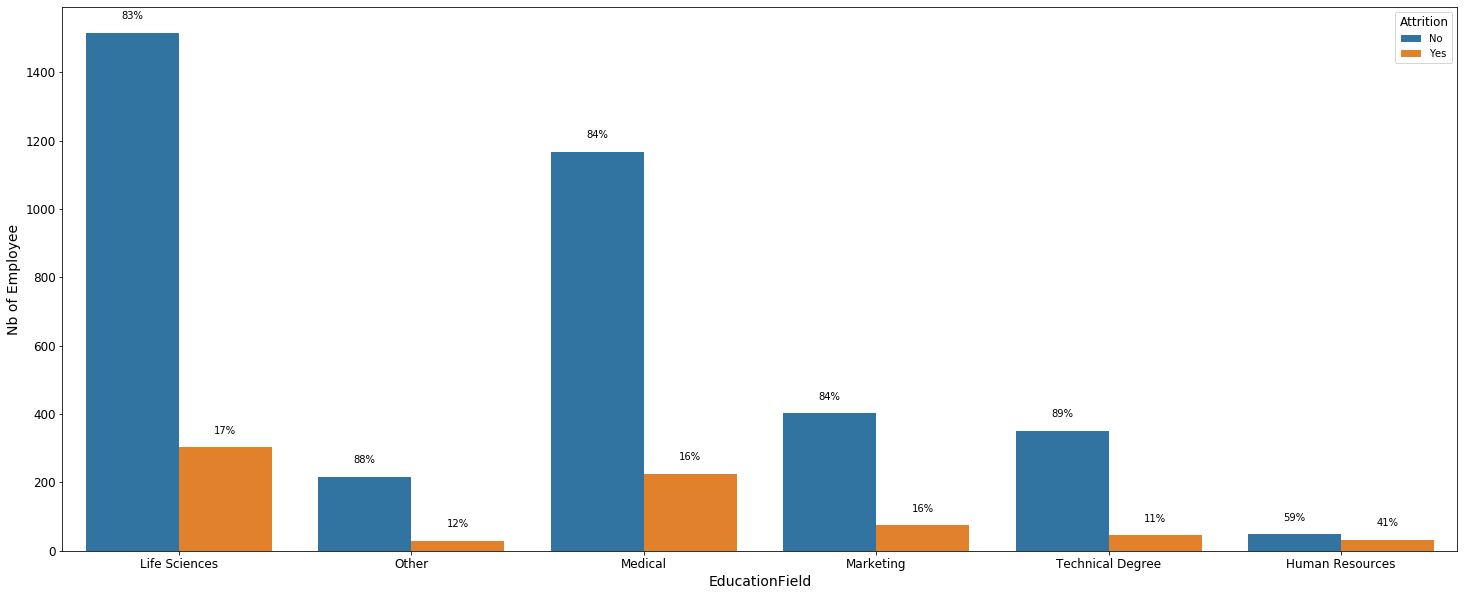

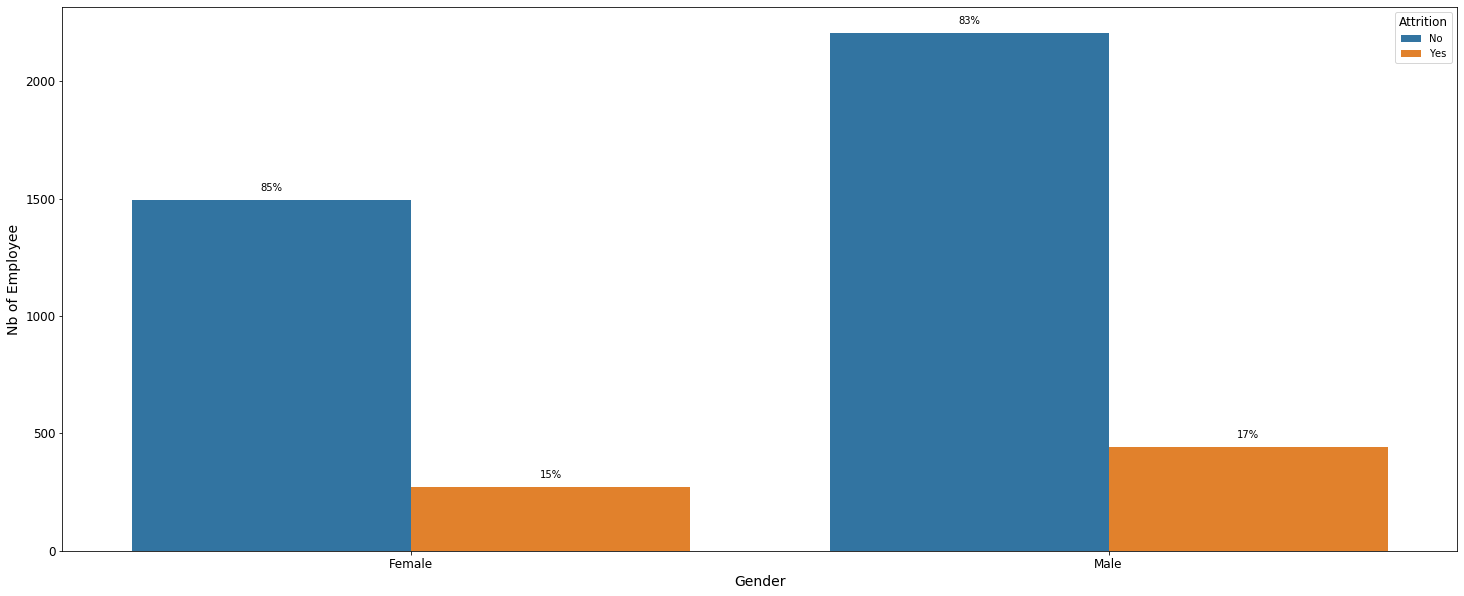

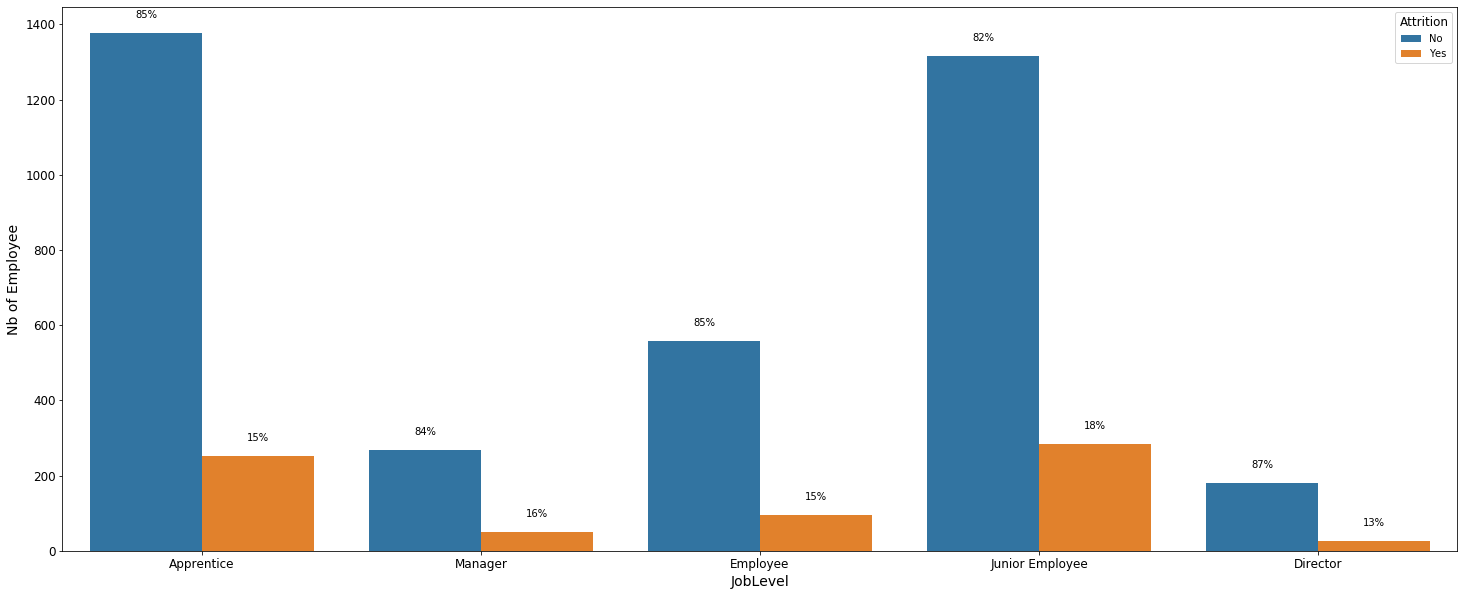

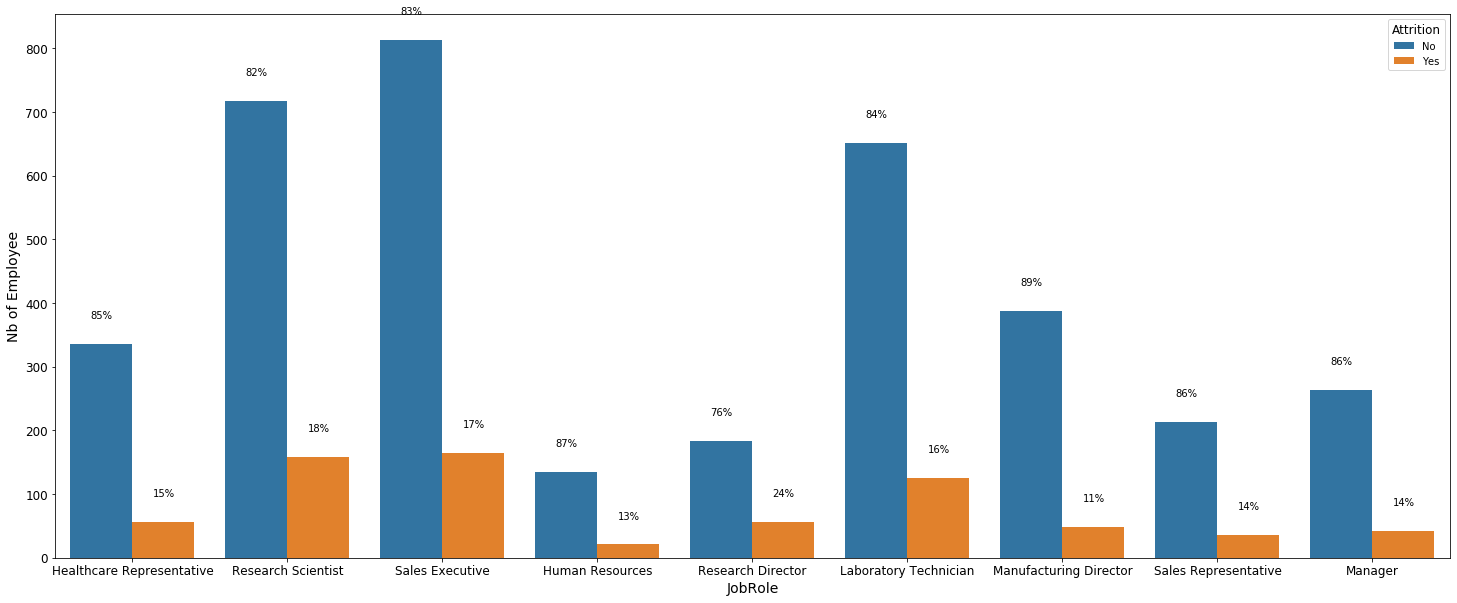

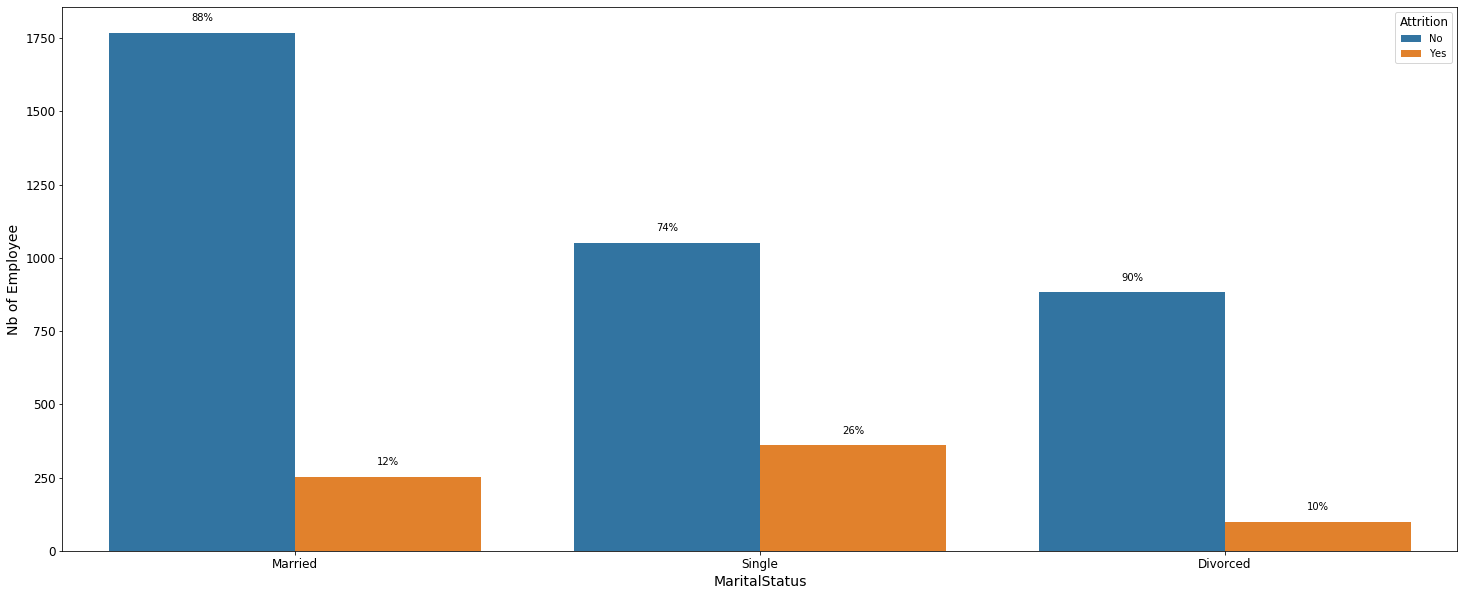

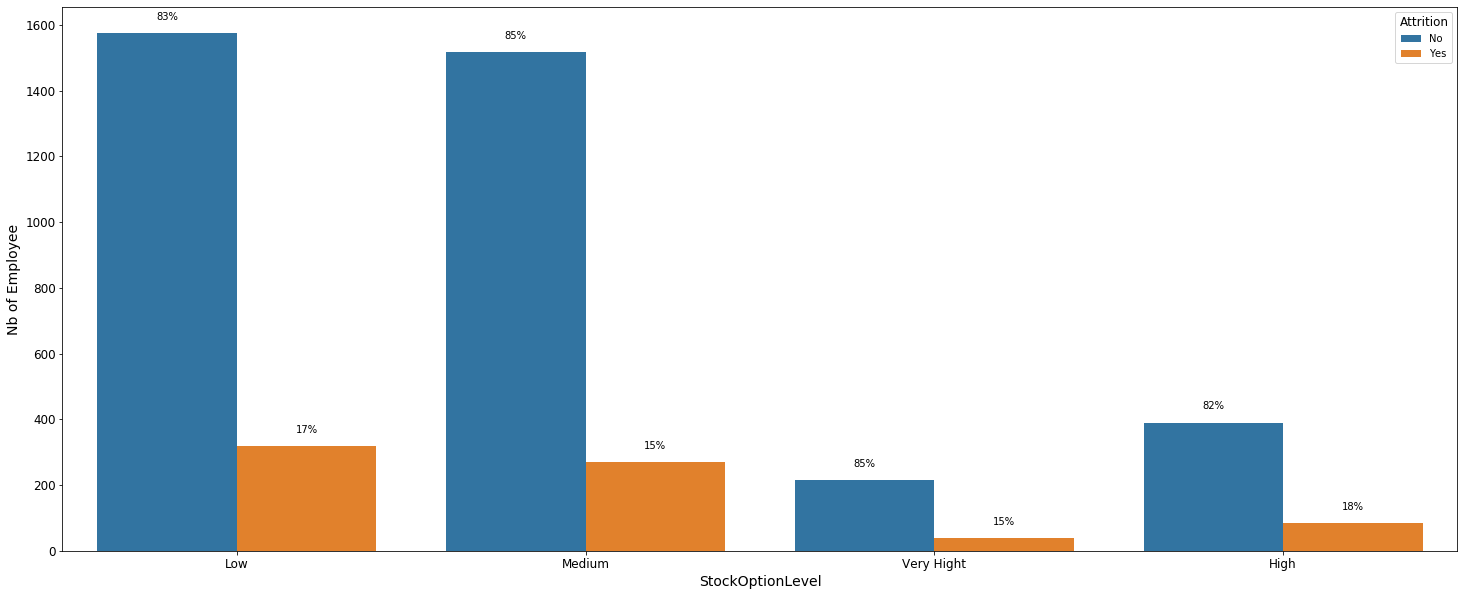

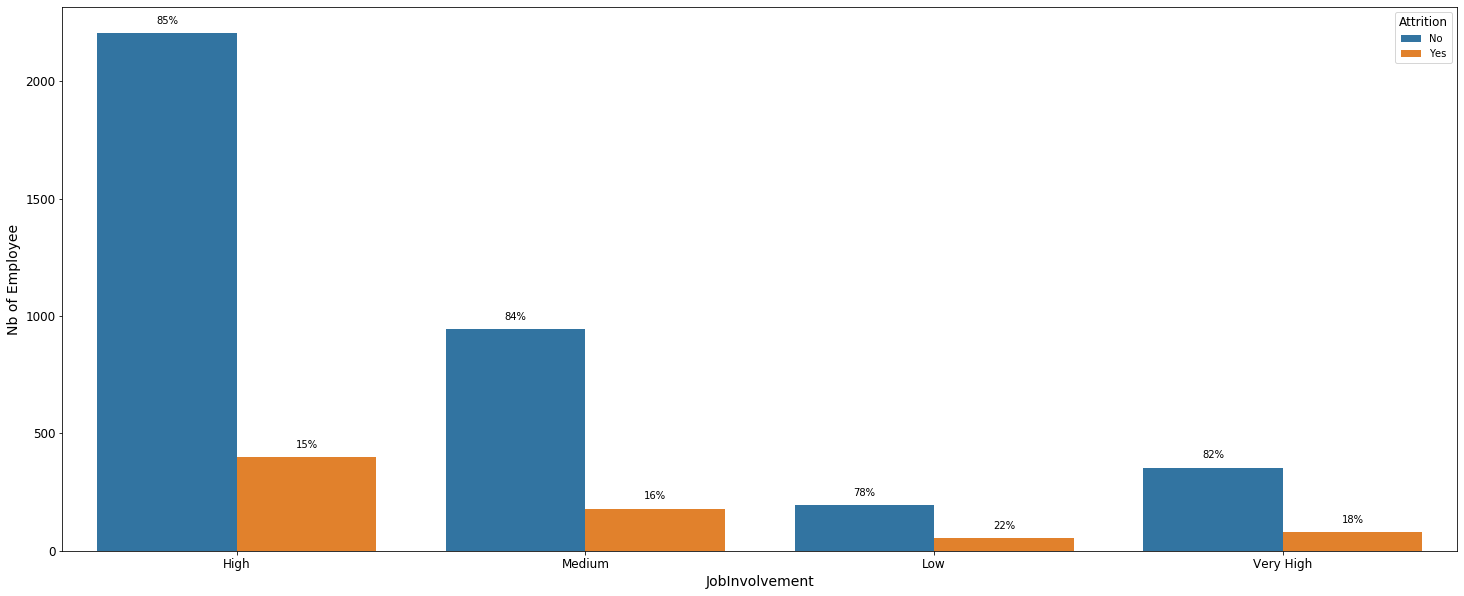

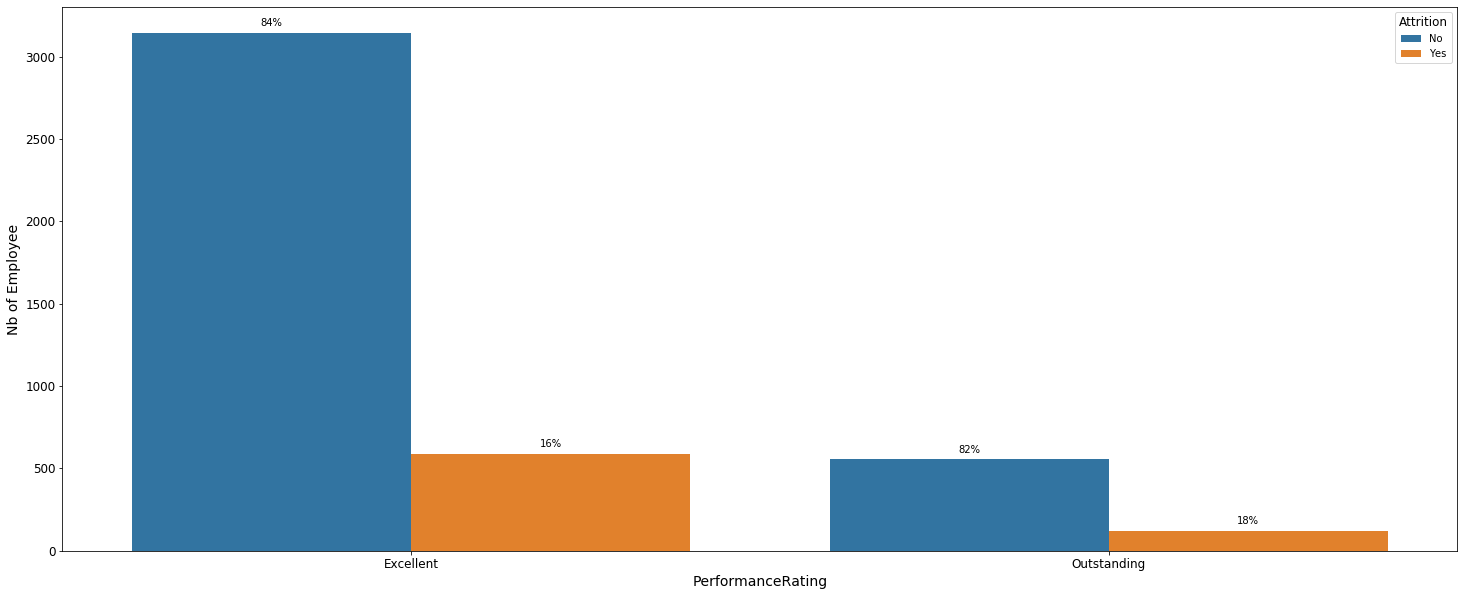

In [89]:
for name_column in allData.select_dtypes(include=['object']).columns:
    if (name_column != "Attrition"):
        plt.figure(figsize=(25,10))
        ax = sns.countplot(x=name_column, data=allData, hue="Attrition")
        ax.set_ylabel('Nb of Employee')
        bars = ax.patches
        half = int(len(bars)/2)
        left_bars = bars[:half]
        right_bars = bars[half:]

        for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r

            ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
            ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

#### Analyse de toutes les variables quantitatives

Vous trouverez en dessous tous les graphes avec les variables de type `number` du jeu de données.

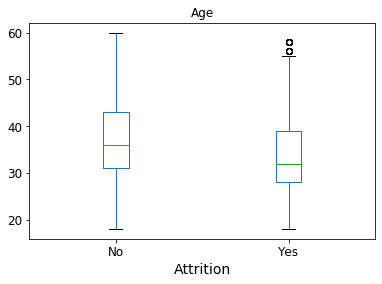

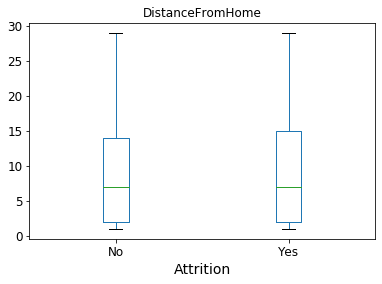

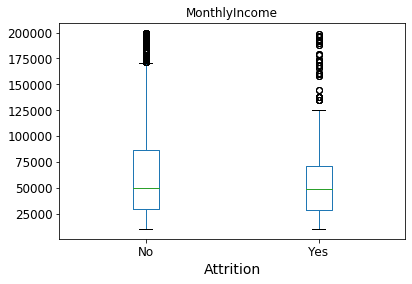

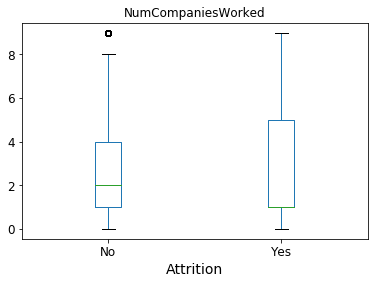

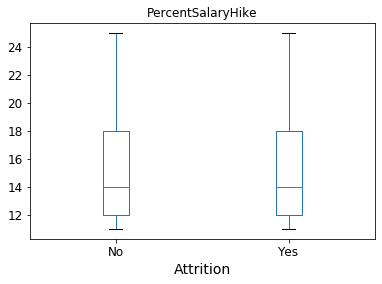

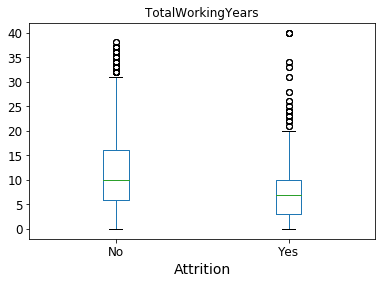

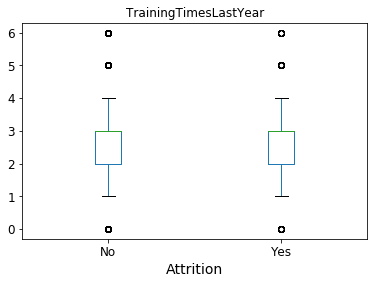

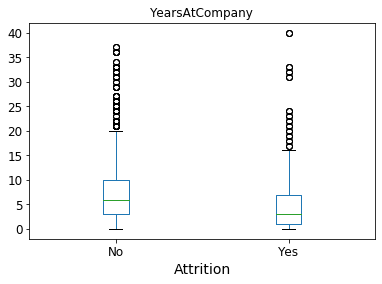

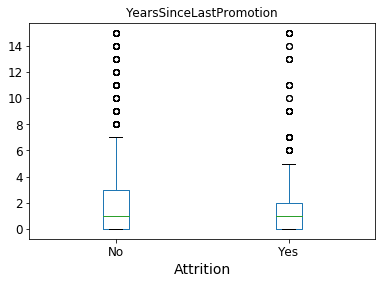

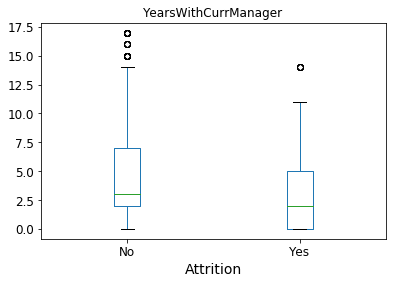

In [90]:
for name_column in allData.select_dtypes(np.number).columns:
    allData.boxplot(by ='Attrition', column = name_column, grid = False, figsize=None) 
    plt.suptitle("")

### B. Test des données

#### Anova

In [91]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
for name_column in allData.select_dtypes(include=np.number).columns:
    test_anova = name_column + ' ~ Attrition'
    model = ols(test_anova, data=allData).fit()
    result_anova = sm.stats.anova_lm(model, typ=2)
    print(name_column, "= F : ", result_anova["F"][0], ", p_value : ", result_anova["PR(>F)"][0], "\033[32mDépendant\033[0m" if result_anova["PR(>F)"][0] < 0.05 else "\033[31mIndépendant\033[0m")

Age = F :  114.63168185909088 , p_value :  1.99680161588347e-26 Dépendant
DistanceFromHome = F :  0.4173697538460119 , p_value :  0.5182860428065224 Indépendant
MonthlyIncome = F :  4.288570383801474 , p_value :  0.038427484905952394 Dépendant
NumCompaniesWorked = F :  7.884212755837609 , p_value :  0.0050088441899783275 Dépendant
PercentSalaryHike = F :  4.670236608422217 , p_value :  0.030743386433341374 Dépendant
TotalWorkingYears = F :  131.4519328410399 , p_value :  5.241246810654903e-30 Dépendant
TrainingTimesLastYear = F :  10.796807998328598 , p_value :  0.0010247061915349563 Dépendant
YearsAtCompany = F :  81.07844519572163 , p_value :  3.16388312248436e-19 Dépendant
YearsSinceLastPromotion = F :  4.811020933642641 , p_value :  0.02833033618936241 Dépendant
YearsWithCurrManager = F :  110.23696796790489 , p_value :  1.7339322652883619e-25 Dépendant


#### Khi2

In [92]:
import scipy.stats as stats


for name_column in allData.select_dtypes(include=['object']).columns:
    if (name_column != "Attrition"):
        matrice = pd.crosstab(allData['Attrition'], allData[name_column])
        chi2, pvalue,dof, expected = stats.chi2_contingency(matrice)
        print(name_column, "= Statistics : ", chi2, ", p_value : ", pvalue, "\033[32mDépendant\033[0m" if pvalue < 0.05 else "\033[31mIndépendant\033[0m")

EnvironmentSatisfaction = Statistics :  65.20741335391335 , p_value :  4.5288923374665606e-14 Dépendant
JobSatisfaction = Statistics :  51.80338311883507 , p_value :  3.298455638541936e-11 Dépendant
WorkLifeBalance = Statistics :  48.97447919261813 , p_value :  1.3208783070533642e-10 Dépendant
BusinessTravel = Statistics :  72.54724105696552 , p_value :  1.764276972983189e-16 Dépendant
Department = Statistics :  29.090274924488266 , p_value :  4.820888218170406e-07 Dépendant
Education = Statistics :  5.641147679249198 , p_value :  0.2275982630178239 Indépendant
EducationField = Statistics :  46.194921001730584 , p_value :  8.288917469574179e-09 Dépendant
Gender = Statistics :  1.349904410246582 , p_value :  0.24529482862926827 Indépendant
JobLevel = Statistics :  6.2691759264759925 , p_value :  0.1799276801337184 Indépendant
JobRole = Statistics :  25.116313674604072 , p_value :  0.001485544744815264 Dépendant
MaritalStatus = Statistics :  138.49102962254608 , p_value :  8.453859406057

### C. Echantillonage stratifié

On considère que le nombre d'années d'expérience' est une variable-clef. Nous désirons effectuer un échantillonage où les jeux d'entraînement et de test respectent les proportions de représentation de cette variable. Pour celà, nous commençons par créer une variable `TotalWorkingYears_cat`, pendant catégoriel de la variable numérique `TotalWorkingYears`

In [93]:
allData["TotalWorkingYears_cat"] = np.ceil(allData["TotalWorkingYears"]/2.5)
allData["TotalWorkingYears_cat"].where(allData["TotalWorkingYears_cat"] < 5, 5.0, inplace=True) # replace where false

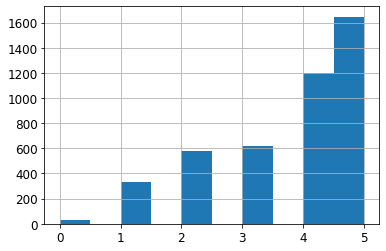

In [94]:
allData["TotalWorkingYears_cat"].hist()

In [95]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(allData, allData["TotalWorkingYears_cat"]):
    print(train_index, test_index) # 1 seul tour de boucle si n_splits = 1
    strat_train_set = allData.loc[train_index]
    strat_test_set = allData.loc[test_index]

[2043 2950 4378 ... 2162 1031 1983] [ 421  885 1473 1186 2616   58  697 2222  666 3627  730 4152 3759 4313
 4066 4032 1154 3213 3661  211 2191 1846 2564 1056  986  905  107 2545
 2553 2926 2513 3902 3111   95  433 2293 1493 1640 1519  743 3019 1804
 2698 3301 2420 1827 4374  331  515  657  167 1623 1492 3784 2121 1454
 1687  903 2072 2108 3038  760 2576 1873 2285  716  999 2821 3829 3341
 3196 2995 4024 2773 1588 1041 3000 1958 3083 2758 3969 1599 3490 3740
 3241 3483  101 1826 3715 1583 4365 4173 1944   33 1096 3206 2784 2933
 3566 2771 1441 4307  255 2152 2713 2368 2086 1407 4329 1365  638 2394
 1118  863  387  734 1419  189 2594  124 4274 1478  142 4142   81 1968
  779 2081 4194  311 4242 1198  425  762   16 3040 4166  655 3432 1135
  485  340 1711  212 1057  574 3017 2171 2503   69 1556 2719 3642  372
    7 1996   34  635 2636 2651 3573 3372  928 2668 3765 3624 1210 4018
  586 2627  995  300 2087  598 4323 2705 2971  990  771 2609 4156 1329
 2884 4292 1049  720 1620  761 2749 1335 

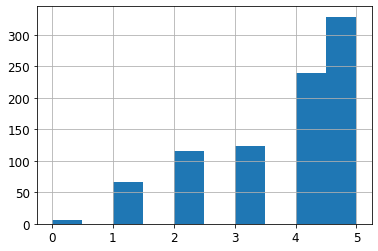

In [96]:
strat_test_set["TotalWorkingYears_cat"].hist()

In [97]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("TotalWorkingYears_cat", axis=1, inplace=True)

## 3. Pipeline ML

In [98]:
dataSetMl = allData.copy()

dataSetMl['PerformanceRating'] = dataSetMl['PerformanceRating'].replace({ 1 : 'Low', 2: 'Good',3: 'Excellent',4: 'Outstanding'}, inplace=True)
dataSetMl['EnvironmentSatisfaction'] = dataSetMl['EnvironmentSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'}, inplace=True)
dataSetMl['JobSatisfaction'] = dataSetMl['JobSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'}, inplace=True)
dataSetMl['JobInvolvement'] = dataSetMl['JobInvolvement'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'}, inplace=True)
dataSetMl['WorkLifeBalance'] = dataSetMl['WorkLifeBalance'].replace({ 1 : 'Bad', 2: 'Good',3: 'Better',4: 'Best'}, inplace=True)
dataSetMl['Education'] = dataSetMl['Education'].replace({ 1 : 'Below College', 2: 'College',3: 'Bachelor',4: 'Master',5 : 'Doctor'}, inplace=True)
dataSetMl['JobLevel'] = dataSetMl["JobLevel"].replace({ 1 : 'Apprentice', 2: 'Junior Employee',3: 'Employee',4: 'Manager',5 : 'Director'}, inplace=True)
dataSetMl['StockOptionLevel'] = dataSetMl['StockOptionLevel'].replace({ 0 : 'Low', 1: 'Medium', 2: 'High', 3: 'Very Hight'}, inplace=True)

dataNum = dataSetMl.select_dtypes(include=[np.number])
dataCat = dataSetMl.select_dtypes(exclude=[np.number])

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(dataNum)
cat_attribs = list(dataCat)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

dataSetPipeline = full_pipeline.fit_transform(dataSetMl)
dataSetPipeline

array([[ 1.54136892, -0.39393818,  1.40513592, ...,  1.        ,
         1.        ,  1.        ],
       [-0.64866811,  0.09963874, -0.491661  , ...,  1.        ,
         1.        ,  1.        ],
       [-0.53916626,  0.96339837,  2.72505331, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [-1.30567922,  1.95055222, -0.5951381 , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.55585225,  1.0867926 , -0.87221027, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.33684855,  2.32073492, -0.21990081, ...,  1.        ,
         1.        ,  1.        ]])

In [100]:
dataSetPipeline.shape

(4410, 47)

## 4. Modèle

## 5. Perfomance 